## **Library**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 12.5 MB/s eta 0:00:00


In [ ]:
!ls

gdrive	sample_data


In [ ]:
# Import the much needed stuff for training
import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

# Checking Tensorflow Version
tf.__version__

'2.12.0'

## **Init Fungsi Ekstraksi Landmark dan Convert CSV**

In [ ]:
def extract_feature(input_image):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    image = cv.imread(input_image)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:
        while True:
            results = hands.process(cv.flip(cv.cvtColor(image, cv.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            # Print handedness (left v.s. right hand).
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Handedness of {input_image}:')
            #print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.

                # Wrist Hand
                wristX = 0
                wristY = 0
                wristZ = 0

                # Thumb Finger
                thumb_CmcX = 0
                thumb_CmcY = 0
                thumb_CmcZ = 0

                thumb_McpX = 0
                thumb_McpY = 0
                thumb_McpZ = 0

                thumb_IpX = 0
                thumb_IpY = 0
                thumb_IpZ = 0

                thumb_TipX = 0
                thumb_TipY = 0
                thumb_TipZ = 0

                # Index Finger
                index_McpX = 0
                index_McpY = 0
                index_McpZ = 0

                index_PipX = 0
                index_PipY = 0
                index_PipZ = 0

                index_DipX = 0
                index_DipY = 0
                index_DipZ = 0

                index_TipX = 0
                index_TipY = 0
                index_TipZ = 0

                # Middle Finger
                middle_McpX = 0
                middle_McpY = 0
                middle_McpZ = 0

                middle_PipX = 0
                middle_PipY = 0
                middle_PipZ = 0

                middle_DipX = 0
                middle_DipY = 0
                middle_DipZ = 0

                middle_TipX = 0
                middle_TipY = 0
                middle_TipZ = 0

                # Ring Finger
                ring_McpX = 0
                ring_McpY = 0
                ring_McpZ = 0

                ring_PipX = 0
                ring_PipY = 0
                ring_PipZ = 0

                ring_DipX = 0
                ring_DipY = 0
                ring_DipZ = 0

                ring_TipX = 0
                ring_TipY = 0
                ring_TipZ = 0

                # Pinky Finger
                pinky_McpX = 0
                pinky_McpY = 0
                pinky_McpZ = 0

                pinky_PipX = 0
                pinky_PipY = 0
                pinky_PipZ = 0

                pinky_DipX = 0
                pinky_DipY = 0
                pinky_DipZ = 0

                pinky_TipX = 0
                pinky_TipY = 0
                pinky_TipZ = 0

                # Set image to Zero
                annotated_image = 0

                # Return Whole Landmark and Image
                return (wristX, wristY, wristZ,
                        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                        thumb_McpX, thumb_McpY, thumb_McpZ,
                        thumb_IpX, thumb_IpY, thumb_IpZ,
                        thumb_TipX, thumb_TipY, thumb_TipZ,
                        index_McpX, index_McpY, index_McpZ,
                        index_PipX, index_PipY, index_PipZ,
                        index_DipX, index_DipY, index_DipZ,
                        index_TipX, index_TipY, index_TipZ,
                        middle_McpX, middle_McpY, middle_McpZ,
                        middle_PipX, middle_PipY, middle_PipZ,
                        middle_DipX, middle_DipY, middle_DipZ,
                        middle_TipX, middle_TipY, middle_TipZ,
                        ring_McpX, ring_McpY, ring_McpZ,
                        ring_PipX, ring_PipY, ring_PipZ,
                        ring_DipX, ring_DipY, ring_DipZ,
                        ring_TipX, ring_TipY, ring_TipZ,
                        pinky_McpX, pinky_McpY, pinky_McpZ,
                        pinky_PipX, pinky_PipY, pinky_PipZ,
                        pinky_DipX, pinky_DipY, pinky_DipZ,
                        pinky_TipX, pinky_TipY, pinky_TipZ,
                        annotated_image)

            annotated_image = cv.flip(image.copy(), 1)
            for hand_landmarks in results.multi_hand_landmarks:
                # Wrist Hand /  Pergelangan Tangan
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # Thumb Finger / Ibu Jari
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z

                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z

                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z

                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # Index Finger / Jari Telunjuk
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z

                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z

                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z

                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # Middle Finger / Jari Tengah
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z

                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z

                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z

                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # Ring Finger / Jari Cincin
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z

                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z

                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z

                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # Pinky Finger / Jari Kelingking
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z

                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z

                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z

                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            return (wristX, wristY, wristZ,
                    thumb_CmcX-wristX, thumb_CmcY-wristY, thumb_CmcZ,
                    thumb_McpX-wristX, thumb_McpY-wristY, thumb_McpZ,
                    thumb_IpX-wristX, thumb_IpY-wristY, thumb_IpZ,
                    thumb_TipX-wristX, thumb_TipY-wristY, thumb_TipZ,
                    index_McpX-wristX, index_McpY-wristY, index_McpZ,
                    index_PipX-wristX, index_PipY-wristY, index_PipZ,
                    index_DipX-wristX, index_DipY-wristY, index_DipZ,
                    index_TipX-wristX, index_TipY-wristY, index_TipZ,
                    middle_McpX-wristX, middle_McpY-wristY, middle_McpZ,
                    middle_PipX-wristX, middle_PipY-wristY, middle_PipZ,
                    middle_DipX-wristX, middle_DipY-wristY, middle_DipZ,
                    middle_TipX-wristX, middle_TipY-wristY, middle_TipZ,
                    ring_McpX-wristX, ring_McpY-wristY, ring_McpZ,
                    ring_PipX-wristX, ring_PipY-wristY, ring_PipZ,
                    ring_DipX-wristX, ring_DipY-wristY, ring_DipZ,
                    ring_TipX-wristX, ring_TipY-wristY, ring_TipZ,
                    pinky_McpX-wristX, pinky_McpY-wristY, pinky_McpZ,
                    pinky_PipX-wristX, pinky_PipY-wristY, pinky_PipZ,
                    pinky_DipX-wristX, pinky_DipY-wristY, pinky_DipZ,
                    pinky_TipX-wristX, pinky_TipY-wristY, pinky_TipZ,
                    annotated_image)

In [ ]:
#Function to create CSV file or add dataset to the existed CSV file
def toCSV(filecsv, class_type,
          wristX, wristY, wristZ,
          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
          thumb_McpX, thumb_McpY, thumb_McpZ,
          thumb_IpX, thumb_IpY, thumb_IpZ,
          thumb_TipX, thumb_TipY, thumb_TipZ,
          index_McpX, index_McpY, index_McpZ,
          index_PipX, index_PipY, index_PipZ,
          index_DipX, index_DipY, index_DipZ,
          index_TipX, index_TipY, index_TipZ,
          middle_McpX, middle_McpY, middle_McpZ,
          middle_PipX, middle_PipY, middle_PipZ,
          middle_DipX, middle_DipY, middle_DipZ,
          middle_TipX, middle_TipY, middle_TipZ,
          ring_McpX, ring_McpY, ring_McpZ,
          ring_PipX, ring_PipY, ring_PipZ,
          ring_DipX, ring_DipY, ring_DipZ,
          ring_TipX, ring_TipY, ring_TipZ,
          pinky_McpX, pinky_McpY, pinky_McpZ,
          pinky_PipX, pinky_PipY, pinky_PipZ,
          pinky_DipX, pinky_DipY, pinky_DipZ,
          pinky_TipX, pinky_TipY, pinky_TipZ):
    if os.path.isfile(filecsv):
        #print ("File exist thus shall write append to the file")
        with open(filecsv, 'a+', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])
    else:
        #print ("File not exist thus shall create new file as", filecsv)
        with open(filecsv, 'w', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow(["class_type",
                             "wristX", "wristY", "wristZ",
                             "thumb_CmcX", "thumb_CmcY", "thumb_CmcZ",
                             "thumb_McpX", "thumb_McpY", "thumb_McpZ",
                             "thumb_IpX", "thumb_IpY", "thumb_IpZ",
                             "thumb_TipX", "thumb_TipY", "thumb_TipZ",
                             "index_McpX", "index_McpY", "index_McpZ",
                             "index_PipX", "index_PipY", "index_PipZ",
                             "index_DipX", "index_DipY", "index_DipZ",
                             "index_TipX", "index_TipY", "index_TipZ",
                             "middle_McpX", "middle_McpY", "middle_McpZ",
                             "middle_PipX", "middle_PipY", "middle_PipZ",
                             "middle_DipX", "middle_DipY", "middle_DipZ",
                             "middle_TipX", "middle_TipY", "middle_TipZ",
                             "ring_McpX", "ring_McpY", "ring_McpZ",
                             "ring_PipX", "ring_PipY", "ring_PipZ",
                             "ring_DipX", "ring_DipY", "ring_DipZ",
                             "ring_TipX", "ring_TipY", "ring_TipZ",
                             "pinky_McpX", "pinky_McpY", "pinky_McpZ",
                             "pinky_PipX", "pinky_PipY", "pinky_PipZ",
                             "pinky_DipX", "pinky_DipY", "pinky_DipZ",
                             "pinky_TipX", "pinky_TipY", "pinky_TipZ"])
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])


##**Ekstrak dataset gambar ke dalam bentuk CSV atau menambahkan dataset ke file csv yang sudah ada**

In [ ]:
# Extract Feature for Training
# We will using SIBI datasets version V02
paths = "/content/gdrive/MyDrive/capstone/datasets/test"
csv_path = "/content/gdrive/MyDrive/capstone/datasets/testing.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")

for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (wristX, wristY, wristZ,
                 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                 thumb_McpX, thumb_McpY, thumb_McpZ,
                 thumb_IpX, thumb_IpY, thumb_IpZ,
                 thumb_TipX, thumb_TipY, thumb_TipZ,
                 index_McpX, index_McpY, index_McpZ,
                 index_PipX, index_PipY, index_PipZ,
                 index_DipX, index_DipY, index_DipZ,
                 index_TipX, index_TipY, index_TipZ,
                 middle_McpX, middle_McpY, middle_McpZ,
                 middle_PipX, middle_PipY, middle_PipZ,
                 middle_DipX, middle_DipY, middle_DipZ,
                 middle_TipX, middle_TipY, middle_TipZ,
                 ring_McpX, ring_McpY, ring_McpZ,
                 ring_PipX, ring_PipY, ring_PipZ,
                 ring_DipX, ring_DipY, ring_DipZ,
                 ring_TipX, ring_TipY, ring_TipZ,
                 pinky_McpX, pinky_McpY, pinky_McpZ,
                 pinky_PipX, pinky_PipY, pinky_PipZ,
                 pinky_DipX, pinky_DipY, pinky_DipZ,
                 pinky_TipX, pinky_TipY, pinky_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))

                if ((not wristX == 0) and (not wristY == 0)):
                    toCSV(csv_path, dirlist,
                          wristX, wristY, wristZ,
                          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                          thumb_McpX, thumb_McpY, thumb_McpZ,
                          thumb_IpX, thumb_IpY, thumb_IpZ,
                          thumb_TipX, thumb_TipY, thumb_TipZ,
                          index_McpX, index_McpY, index_McpZ,
                          index_PipX, index_PipY, index_PipZ,
                          index_DipX, index_DipY, index_DipZ,
                          index_TipX, index_TipY, index_TipZ,
                          middle_McpX, middle_McpY, middle_McpZ,
                          middle_PipX, middle_PipY, middle_PipZ,
                          middle_DipX, middle_DipY, middle_DipZ,
                          middle_TipX, middle_TipY, middle_TipZ,
                          ring_McpX, ring_McpY, ring_McpZ,
                          ring_PipX, ring_PipY, ring_PipZ,
                          ring_DipX, ring_DipY, ring_DipZ,
                          ring_TipX, ring_TipY, ring_TipZ,
                          pinky_McpX, pinky_McpY, pinky_McpZ,
                          pinky_PipX, pinky_PipY, pinky_PipZ,
                          pinky_DipX, pinky_DipY, pinky_DipZ,
                          pinky_TipX, pinky_TipY, pinky_TipZ,)

                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")

print("===================Feature Extraction for TRAINING is Completed===================")


CSV File does exist, going delete before start extraction and replace it with new
Inside Folder .ipynb_checkpoints Consist : 0 Imageset
Inside Folder A Consist : 0 Imageset
Inside Folder A Consist : 0 Imageset
Inside Folder B Consist : 0 Imageset
Inside Folder B Consist : 0 Imageset


KeyboardInterrupt: ignored

In [ ]:
# Extract Feature for Training
# We will using SIBI datasets version V02
paths = "/content/gdrive/MyDrive/capstone/datasets/test"
csv_path = "/content/gdrive/MyDrive/capstone/datasets/testing.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")

for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (wristX, wristY, wristZ,
                 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                 thumb_McpX, thumb_McpY, thumb_McpZ,
                 thumb_IpX, thumb_IpY, thumb_IpZ,
                 thumb_TipX, thumb_TipY, thumb_TipZ,
                 index_McpX, index_McpY, index_McpZ,
                 index_PipX, index_PipY, index_PipZ,
                 index_DipX, index_DipY, index_DipZ,
                 index_TipX, index_TipY, index_TipZ,
                 middle_McpX, middle_McpY, middle_McpZ,
                 middle_PipX, middle_PipY, middle_PipZ,
                 middle_DipX, middle_DipY, middle_DipZ,
                 middle_TipX, middle_TipY, middle_TipZ,
                 ring_McpX, ring_McpY, ring_McpZ,
                 ring_PipX, ring_PipY, ring_PipZ,
                 ring_DipX, ring_DipY, ring_DipZ,
                 ring_TipX, ring_TipY, ring_TipZ,
                 pinky_McpX, pinky_McpY, pinky_McpZ,
                 pinky_PipX, pinky_PipY, pinky_PipZ,
                 pinky_DipX, pinky_DipY, pinky_DipZ,
                 pinky_TipX, pinky_TipY, pinky_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))

                if ((not wristX == 0) and (not wristY == 0)):
                    toCSV(csv_path, dirlist,
                          wristX, wristY, wristZ,
                          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                          thumb_McpX, thumb_McpY, thumb_McpZ,
                          thumb_IpX, thumb_IpY, thumb_IpZ,
                          thumb_TipX, thumb_TipY, thumb_TipZ,
                          index_McpX, index_McpY, index_McpZ,
                          index_PipX, index_PipY, index_PipZ,
                          index_DipX, index_DipY, index_DipZ,
                          index_TipX, index_TipY, index_TipZ,
                          middle_McpX, middle_McpY, middle_McpZ,
                          middle_PipX, middle_PipY, middle_PipZ,
                          middle_DipX, middle_DipY, middle_DipZ,
                          middle_TipX, middle_TipY, middle_TipZ,
                          ring_McpX, ring_McpY, ring_McpZ,
                          ring_PipX, ring_PipY, ring_PipZ,
                          ring_DipX, ring_DipY, ring_DipZ,
                          ring_TipX, ring_TipY, ring_TipZ,
                          pinky_McpX, pinky_McpY, pinky_McpZ,
                          pinky_PipX, pinky_PipY, pinky_PipZ,
                          pinky_DipX, pinky_DipY, pinky_DipZ,
                          pinky_TipX, pinky_TipY, pinky_TipZ,)

                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")

print("===================Feature Extraction for TRAINING is Completed===================")


In [ ]:
# Extract Feature for Validation
# We will using SIBI datasets version V02
paths = "/content/gdrive/MyDrive/capstone/datasets/validation/"
csv_path = "/content/gdrive/MyDrive/capstone/datasets/hands_SIBI_validation.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")

for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (wristX, wristY, wristZ,
                 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                 thumb_McpX, thumb_McpY, thumb_McpZ,
                 thumb_IpX, thumb_IpY, thumb_IpZ,
                 thumb_TipX, thumb_TipY, thumb_TipZ,
                 index_McpX, index_McpY, index_McpZ,
                 index_PipX, index_PipY, index_PipZ,
                 index_DipX, index_DipY, index_DipZ,
                 index_TipX, index_TipY, index_TipZ,
                 middle_McpX, middle_McpY, middle_McpZ,
                 middle_PipX, middle_PipY, middle_PipZ,
                 middle_DipX, middle_DipY, middle_DipZ,
                 middle_TipX, middle_TipY, middle_TipZ,
                 ring_McpX, ring_McpY, ring_McpZ,
                 ring_PipX, ring_PipY, ring_PipZ,
                 ring_DipX, ring_DipY, ring_DipZ,
                 ring_TipX, ring_TipY, ring_TipZ,
                 pinky_McpX, pinky_McpY, pinky_McpZ,
                 pinky_PipX, pinky_PipY, pinky_PipZ,
                 pinky_DipX, pinky_DipY, pinky_DipZ,
                 pinky_TipX, pinky_TipY, pinky_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))

                if ((not wristX == 0) and (not wristY == 0)):
                    toCSV(csv_path, dirlist,
                          wristX, wristY, wristZ,
                          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                          thumb_McpX, thumb_McpY, thumb_McpZ,
                          thumb_IpX, thumb_IpY, thumb_IpZ,
                          thumb_TipX, thumb_TipY, thumb_TipZ,
                          index_McpX, index_McpY, index_McpZ,
                          index_PipX, index_PipY, index_PipZ,
                          index_DipX, index_DipY, index_DipZ,
                          index_TipX, index_TipY, index_TipZ,
                          middle_McpX, middle_McpY, middle_McpZ,
                          middle_PipX, middle_PipY, middle_PipZ,
                          middle_DipX, middle_DipY, middle_DipZ,
                          middle_TipX, middle_TipY, middle_TipZ,
                          ring_McpX, ring_McpY, ring_McpZ,
                          ring_PipX, ring_PipY, ring_PipZ,
                          ring_DipX, ring_DipY, ring_DipZ,
                          ring_TipX, ring_TipY, ring_TipZ,
                          pinky_McpX, pinky_McpY, pinky_McpZ,
                          pinky_PipX, pinky_PipY, pinky_PipZ,
                          pinky_DipX, pinky_DipY, pinky_DipZ,
                          pinky_TipX, pinky_TipY, pinky_TipZ,)

                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")

print("===================Feature Extraction for VALIDATION is Completed===================")

## **Load File CSV train dan test**

In [ ]:
# Read CSV file for Training the model using Pandas
df_train = pd.read_csv("/content/gdrive/MyDrive/capstone/datasets/hands_SIBI_training.csv", header=0)
# Read CSV file for Validation or Testing the Model using Pandas
df_test = pd.read_csv("/content/gdrive/MyDrive/capstone/datasets/hands_SIBI_validation.csv", header=0)

## **Load File CSV**



In [ ]:



# First we must sort the values of the dataset according to the Alphabets
df_train = df_train.sort_values(by=["class_type"])

df_train

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
1055,A,1362.999182,1567.591513,-1.316850e-06,-228.605157,-74.508655,-0.033757,-420.377727,-275.134815,-0.042268,...,-0.032782,4.312138,-624.409708,-0.063417,-11.114874,-467.955153,-0.034953,28.373790,-420.303298,-0.002729
1053,A,1125.092268,1526.317120,-1.573974e-06,-323.054016,-150.728345,-0.084662,-529.358983,-501.024365,-0.107304,...,-0.018350,253.015518,-802.577674,-0.075007,185.870647,-578.620970,-0.045321,168.736577,-530.068159,-0.004508
1052,A,1198.422074,1468.153715,-1.746817e-06,-385.674596,-104.393959,-0.061674,-637.404442,-465.539694,-0.071301,...,-0.031390,140.048385,-844.776392,-0.082728,88.665366,-603.480339,-0.049932,97.016573,-520.625591,-0.008565
1051,A,1148.512363,1480.426311,-1.655287e-06,-336.167097,-155.813813,-0.080697,-553.264380,-484.287739,-0.102127,...,-0.017836,219.402075,-818.318665,-0.071972,153.638363,-594.638586,-0.041651,137.143850,-542.721987,-0.001148
1050,A,1340.898639,1559.810947,-1.348832e-06,-234.267271,-50.696661,-0.030880,-445.046137,-268.299759,-0.035958,...,-0.034811,-2.145244,-633.139928,-0.066216,-12.220949,-475.082015,-0.036382,34.133787,-427.276772,-0.002397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Z,780.233285,1866.022729,7.080775e-07,32.198069,-8.621666,-0.167686,183.278420,-9.335327,-0.211555,...,0.030909,509.142985,-33.919481,-0.030777,419.219947,17.632560,-0.047010,346.763798,-12.326777,-0.042470
18,Z,454.173088,1291.070938,8.076352e-07,22.741675,-79.055548,-0.173738,172.725677,-186.620235,-0.233716,...,0.027220,589.341044,-178.431034,-0.055208,467.173338,-75.513959,-0.069425,353.088140,-60.148001,-0.056575
9,Z,265.467346,1484.784365,2.655130e-07,181.961656,-101.300359,-0.221616,466.990054,-168.833137,-0.233599,...,0.175156,844.665110,-121.372104,0.080964,719.510794,1.764297,0.038428,610.590279,17.006397,0.041642
6,Z,437.798515,814.932629,7.874692e-07,1.733288,-2.466719,-0.112498,53.766757,-5.885840,-0.159176,...,-0.033437,154.937983,24.785587,-0.098551,119.228885,43.061080,-0.103917,91.609597,46.199045,-0.091268


In [ ]:


# First we must sort the values of the dataset according to the Alphabets
df_test = df_test.sort_values(by=["class_type"])

df_test

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
211,A,303.739804,3094.464386,2.659254e-07,70.006107,83.909454,-0.009913,81.120854,164.617218,-0.005684,...,0.074704,-32.880043,174.540344,0.101987,-14.656908,195.219086,0.118750,0.145738,201.787262,0.130978
204,A,1400.900648,1702.873454,-2.118501e-06,-372.727715,-78.738571,-0.053557,-666.804742,-454.654692,-0.057151,...,-0.038765,80.879017,-924.190325,-0.081240,42.678260,-683.112257,-0.032489,108.407561,-643.404105,0.019744
205,A,626.763403,1036.431742,-1.010617e-06,-69.410607,-23.417175,-0.019210,-123.788953,-96.054874,-0.019415,...,-0.026157,19.945264,-185.537157,-0.045292,12.129486,-140.453117,-0.022630,22.363231,-126.204539,0.002203
206,A,749.511778,1684.732795,-1.402203e-06,-185.634196,-230.985761,-0.036049,-263.174683,-535.655975,-0.054778,...,-0.049362,396.168172,-556.587934,-0.089420,316.475213,-413.655758,-0.065419,268.431604,-327.154756,-0.034874
210,A,1001.917591,2460.414986,-1.745873e-06,-305.496968,-69.163731,-0.063557,-528.395463,-358.572155,-0.090448,...,-0.106785,119.793162,-571.885048,-0.162875,50.206299,-382.470428,-0.131850,85.071574,-372.380894,-0.094612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Z,1742.245886,2565.417858,2.051919e-07,-51.115368,-44.849121,-0.055253,-69.366208,-139.580360,-0.085446,...,-0.039117,236.293233,-182.259087,-0.081821,233.193621,-99.254322,-0.087077,212.060869,-43.547390,-0.081235
3,Z,419.210538,803.868769,1.096723e-06,-5.276084,-6.669199,-0.082273,32.824472,-22.724700,-0.114152,...,-0.026706,117.192641,-10.636241,-0.078534,94.908357,8.915350,-0.085076,73.801339,21.485814,-0.075589
2,Z,714.616837,1737.252332,5.697456e-07,23.438312,-6.061667,-0.164272,153.972383,-26.179144,-0.212302,...,0.016008,483.732969,-75.841702,-0.047885,400.381549,-18.307375,-0.063421,333.207152,-42.302544,-0.058266
1,Z,687.228024,1365.019202,6.465051e-07,47.003865,-22.792935,-0.180457,223.415256,-38.810730,-0.231182,...,0.019234,621.710837,-76.003194,-0.054561,514.450490,-1.346946,-0.063278,425.386727,-34.834146,-0.049138


In [ ]:
# Put Categorical using Pandas
df_train["class_type"] = pd.Categorical(df_train["class_type"])
df_train["class_type"] = df_train.class_type.cat.codes

df_test["class_type"] = pd.Categorical(df_test["class_type"])
df_test["class_type"] = df_test.class_type.cat.codes

In [ ]:
# Copy Label and Feature for training
y_train = df_train.pop("class_type")
x_train = df_train.copy()

y_test = df_test.pop("class_type")
x_test = df_test.copy()

# Copied Features turn to Array by using NumPy
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
# Check Array Shape before transformation
print(x_train.shape)
print(x_test.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)
print(x_test.shape)

(1056, 63)
(212, 63)
(1056, 63, 1)
(212, 63, 1)


In [ ]:
# Check sample train and test features
# print(x_train[0])
# print(x_test[7])

In [ ]:
# Number of classes according standard Indonesian Language Alphabets
num_classes = 26

# Using the Keras.Utils to put the label categorically
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## **Train Model**

In [ ]:
# Hard Encode for the Prediction
classes = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25
}

In [ ]:
# One Dimensional Convolutional Neural Network model, Train will be feed to 1 Dimension Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv1D(filters=512, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=512, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 1024 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 32)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 63, 32)            5152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 32)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 31, 64)            10304     
                                                                 
 conv1d_3 (Conv1D)           (None, 31, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 64)           0         
 1D)                                                    

In [ ]:
#Train the Model
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint('/content/gdrive/MyDrive/capstone/datasets/best_model_1406.h5', monitor='val_loss', save_best_only=True)
model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test), callbacks=[checkpoint_callback])

Epoch 1/200
33/33 [==============================] - 21s 525ms/step - loss: 3.2652 - accuracy: 0.0256 - val_loss: 3.1528 - val_accuracy: 0.0566
Epoch 2/200
33/33 [==============================] - 16s 500ms/step - loss: 3.1382 - accuracy: 0.0682 - val_loss: 3.0270 - val_accuracy: 0.0849
Epoch 3/200
33/33 [==============================] - 16s 494ms/step - loss: 2.9913 - accuracy: 0.0758 - val_loss: 2.7674 - val_accuracy: 0.0849
Epoch 4/200
33/33 [==============================] - 16s 495ms/step - loss: 2.7219 - accuracy: 0.0947 - val_loss: 2.5918 - val_accuracy: 0.1557
Epoch 5/200
33/33 [==============================] - 17s 531ms/step - loss: 2.4975 - accuracy: 0.1458 - val_loss: 2.2315 - val_accuracy: 0.2123
Epoch 6/200
33/33 [==============================] - 18s 548ms/step - loss: 2.2438 - accuracy: 0.1951 - val_loss: 2.0835 - val_accuracy: 0.2547
Epoch 7/200
33/33 [==============================] - 16s 492ms/step - loss: 2.0553 - accuracy: 0.2216 - val_loss: 1.9324 - val_accuracy:

In [ ]:
#Saving the model into H5 system file
save_model = "/content/gdrive/MyDrive/capstone/datasets/MODEL_1406.h5"
# save_model_path = "/content/gdrive/MyDrive/capstone/datasets/"
# tf.saved_model.save(model, save_model_path)
model.save(save_model)
print("Model Saved into", save_model)

Model Saved into /content/gdrive/MyDrive/capstone/datasets/MODEL_1406.h5


## **Load Model**
model = tf.keras.models.load_model('path modelnya')

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/capstone/datasets/MODEL_1406.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 32)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 63, 32)            5152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 32)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 31, 64)            10304     
                                                                 
 conv1d_3 (Conv1D)           (None, 31, 64)            20544     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 64)           0         
 1D)                                                    

## **Coba Tes Hasil Training**

In [ ]:
!apt-get install -y xvfb python-opengl ffmpeg
!pip install pyvirtualdisplay
!pip install opencv-python


Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
The following additional packages will be installed:
  freeglut3 libfontenc1 libpython2-stdlib libxfont2 libxkbfile1 python2
  python2-minimal x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
Suggested packages:
  python-tk python-numpy libgle3 python2-doc
The following NEW packages will be installed:
  freeglut3 libfontenc1 libpython2-stdlib libxfont2 libxkbfile1 python-opengl
  python2 python2-minimal x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 14 newly installed, 0 to remove and 15 not upgraded.
Need to get 8,318 kB of archives.
After this operation, 18.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2-minimal amd64 2.7.17-2ubuntu4 [27.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


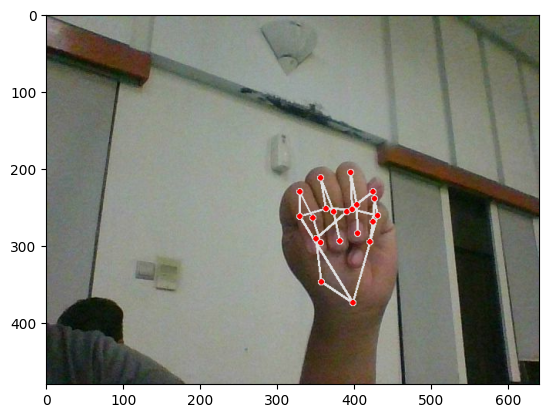

1/1 [==============================] - 0s 23ms/step
[12]
1/1 [==============================] - 0s 15ms/step
[12]
Possible Alphabet according to the input :  M 12


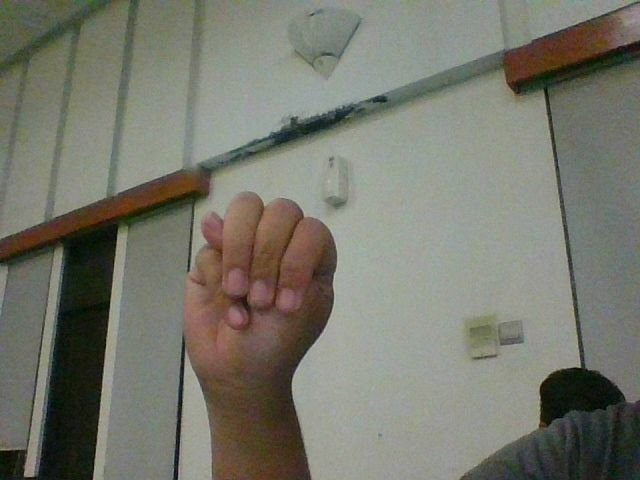

In [ ]:
# Directly from Imageset Dataset Testing
#Load Image and do Feature Extraction
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  path_to_image = filename
  (wristX, wristY, wristZ,
  thumb_CmcX, thumb_CmcY, thumb_CmcZ,
  thumb_McpX, thumb_McpY, thumb_McpZ,
  thumb_IpX, thumb_IpY, thumb_IpZ,
  thumb_TipX, thumb_TipY, thumb_TipZ,
  index_McpX, index_McpY, index_McpZ,
  index_PipX, index_PipY, index_PipZ,
  index_DipX, index_DipY, index_DipZ,
  index_TipX, index_TipY, index_TipZ,
  middle_McpX, middle_McpY, middle_McpZ,
  middle_PipX, middle_PipY, middle_PipZ,
  middle_DipX, middle_DipY, middle_DipZ,
  middle_TipX, middle_TipY, middle_TipZ,
  ring_McpX, ring_McpY, ring_McpZ,
  ring_PipX, ring_PipY, ring_PipZ,
  ring_DipX, ring_DipY, ring_DipZ,
  ring_TipX, ring_TipY, ring_TipZ,
  pinky_McpX, pinky_McpY, pinky_McpZ,
  pinky_PipX, pinky_PipY, pinky_PipZ,
  pinky_DipX, pinky_DipY, pinky_DipZ,
  pinky_TipX, pinky_TipY, pinky_TipZ,
  output_IMG) = extract_feature(path_to_image)

  #print(wristX, wristY,
  #      thumb_CmcX, thumb_CmcY, thumb_McpX, thumb_McpY, thumb_IpX, thumb_IpY, thumb_TipX, thumb_TipY,
  #      index_McpX, index_McpY, index_PipX, index_PipY, index_DipX, index_DipY, index_TipX, index_TipY,
  #      middle_McpX, middle_McpY, middle_PipX, middle_PipY, middle_DipX, middle_DipY, middle_TipX, middle_TipY,
  #      ring_McpX, ring_McpY, ring_PipX, ring_PipY, ring_DipX, ring_DipY, ring_TipX, ring_TipY,
  #      pinky_McpX, pinky_McpY, pinky_PipX, pinky_PipY, pinky_DipX, pinky_DipY, pinky_TipX, pinky_TipY)
  plt.axis("on")
  plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
  plt.show()
  ###################################
  #Shape the image features into an 1x3 array.
  input_IMG = np.array([[[wristX], [wristY], [wristZ],
                      [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                      [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                      [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                      [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                      [index_McpX], [index_McpY], [index_McpZ],
                      [index_PipX], [index_PipY], [index_PipZ],
                      [index_DipX], [index_DipY], [index_DipZ],
                      [index_TipX], [index_TipY], [index_TipZ],
                      [middle_McpX], [middle_McpY], [middle_McpZ],
                      [middle_PipX], [middle_PipY], [middle_PipZ],
                      [middle_DipX], [middle_DipY], [middle_DipZ],
                      [middle_TipX], [middle_TipY], [middle_TipZ],
                      [ring_McpX], [ring_McpY], [ring_McpZ],
                      [ring_PipX], [ring_PipY], [ring_PipZ],
                      [ring_DipX], [ring_DipY], [ring_DipZ],
                      [ring_TipX], [ring_TipY], [ring_TipZ],
                      [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                      [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                      [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                      [pinky_TipX], [pinky_TipY], [pinky_TipZ]]])

  # print(input_IMG.shape)
  # print(input_IMG)
  ########################
  #Print the Prediction
  # print(model.predict(input_IMG))
  y_predict = np.argmax(model.predict(input_IMG), axis=-1)
  print(y_predict)
  # print(model.predict_classes(input_IMG))
  predictions = np.argmax(model.predict(input_IMG), axis=-1)
  print(predictions)
  for alphabets, values in classes.items():
      if values == predictions[0] :
          print("Possible Alphabet according to the input : ", alphabets, values)
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
# path_to_image = "/content/gdrive/MyDrive/capstone/datasets/test/Y (3).jpg"



In [ ]:
#for testing

# Load the testing data
x_test = np.genfromtxt('/content/gdrive/MyDrive/capstone/datasets/testing2.csv', delimiter=',')

# Load the labels
y_test = np.genfromtxt('/content/gdrive/MyDrive/capstone/datasets/LABEL.csv', delimiter=',')

# Reshape the data if necessary

# Assuming you have already loaded and preprocessed your dataset

# Create an empty list to store the predictions
predictions = []
# Iterate over each data point
for data in x_test:
    # Reshape the data if necessary
    data = np.reshape(data, (1, 63, 1))

    # Make the prediction
    # prediction = model.predict(data)
    prediction=np.argmax(model.predict(data), axis=-1)
    # Append the prediction to the list
    predictions.append(prediction)

# Convert the list of predictions to a numpy array
print(x_test.shape)
predictions = np.array(predictions)
y_test = np.array(y_test)

# Convert predictions to one-hot encoded labels
y_test = y_test.astype(int)
predictions = predictions[1:]
print('PREDICT ='.format(predictions.flatten()))
print(predictions.flatten())
print('TEST  ='.format(y_test))
print(y_test)
# Compare predictions with ground truth labels

# Compare predictions with ground truth labels
correct_predictions = np.sum(predictions.flatten() == y_test)
print(correct_predictions)
total_predictions = y_test.shape[0]

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print('Accuracy: {:.2f}%'.format(accuracy * 100))

# predictions_encoded = np.argmax(predictions, axis=1)
# print(predictions_encoded)
# Compare predictions with ground truth labels
# correct_predictions = np.sum(predictions == y_test)
# total_predictions = y_test.shape[0]

# # Calculate accuracy
# accuracy = correct_predictions / total_predictions
# print('Accuracy: {:.2f}%'.format(accuracy * 100))


1/1 [==============================] - 0s 50ms/step
(27, 63)
PREDICT =
[ 0  1  2  3  4  5  6  7  8  9 13 11 12 10 14 15 16 17 18 19 20 21 22 23
 24 25]
TEST  =
[ 0  1  2  3  4  5  6  7  8  9 13 11 12 10 14 15 16 17 18 19 20 21 22 23
 24 25]
26
Accuracy: 100.00%
